In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

path="C:/Users/Prakhar/Desktop/python/advanced_regression/"
house_df=pd.read_csv(path+"train.csv",  encoding = "ISO-8859-1")#reading dataframe from csv file

In [2]:
house_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [3]:
#taking out the continuous variables into a new dataframe to perform EDA
cont_house_df=house_df.select_dtypes(include=['float64', 'int64'])
cont_house_df

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       196.0         706  ...           0   
1          1976          1976         0.0         978  ...         298   
2          2001          2002       162.0         486  ...           0   
3          1915          1970         0.0         216  ...           0   
4          2000          2000       350.0         655  ...         192   
...         ...           ...         ...         ...  ...         ...   
1455       1999          2000         0.0           0  ...           0   
1456       1978          1988       119.0         790  ...         349   
1457       1941          2006         0.0         275  ...           0   
1458       1950          1996         0.0          49  ...         366   
1459       1965          1965         0.0         830  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 38 columns]

In [4]:
#taking out the categorical variables into a new dataframe to perform EDA
cat_house_df=house_df.select_dtypes(include=['object'])
cat_house_df

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0         CollgCr       Norm  ...     Attchd          RFn         TA   
1         Veenker      Feedr  ...     Attchd          RFn         TA   
2         CollgCr       Norm  ...     Attchd          RFn         TA   
3         Crawfor       Norm  ...     Detchd          Unf         TA   
4         NoRidge       Norm  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1455      Gilbert       Norm  ...     Attchd          RFn         TA   
1456       NWAmes       Norm  ...     Attchd          Unf         TA   
1457      Crawfor       Norm  ...     Attchd          RFn         TA   
1458        NAmes       Norm  ...     Attchd          Unf         TA   
1459      Edwards       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN    NaN         NaN       WD        Normal  
1            TA          Y    NaN    NaN         NaN       WD        Normal  
2            TA          Y    NaN    NaN         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD       Abnorml  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y    NaN    NaN         NaN       WD        Normal  
1456         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1457         TA          Y    NaN  GdPrv        Shed       WD        Normal  
1458         TA          Y    NaN    NaN         NaN       WD        Normal  
1459         TA          Y    NaN    NaN         NaN       WD        Normal  

[1460 rows x 43 columns]

In [5]:
#checking for outliers in the continuous variables
cont_house_df.iloc[:,:20].describe(percentiles=[0.75,0.99])
cont_house_df.iloc[:,19:].describe(percentiles=[0.75,0.99])
cont_house_df.iloc[:,40:42].describe(percentiles=[0.75,0.99])

FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
count  1460.000000  1460.000000   1460.000000   1460.000000   1460.000000   
mean      1.565068     0.382877      2.866438      1.046575      6.517808   
std       0.550916     0.502885      0.815778      0.220338      1.625393   
min       0.000000     0.000000      0.000000      0.000000      2.000000   
50%       2.000000     0.000000      3.000000      1.000000      6.000000   
75%       2.000000     1.000000      3.000000      1.000000      7.000000   
99%       3.000000     1.000000      5.000000      2.000000     11.000000   
max       3.000000     2.000000      8.000000      3.000000     14.000000   

        Fireplaces  GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  \
count  1460.000000  1379.000000  1460.000000  1460.000000  1460.000000   
mean      0.613014  1978.506164     1.767123   472.980137    94.244521   
std       0.644666    24.689725     0.747315   213.804841   125.338794   
min       0.000000  1900.000000     0.000000     0.000000     0.000000   
50%       1.000000  1980.000000     2.000000   480.000000     0.000000   
75%       1.000000  2002.000000     2.000000   576.000000   168.000000   
99%       2.000000  2009.000000     3.000000  1002.790000   505.460000   
max       3.000000  2010.000000     4.000000  1418.000000   857.000000   

       OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch     PoolArea  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.660274      21.954110     3.409589    15.060959     2.758904   
std      66.256028      61.119149    29.317331    55.757415    40.177307   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
50%      25.000000       0.000000     0.000000     0.000000     0.000000   
75%      68.000000       0.000000     0.000000     0.000000     0.000000   
99%     285.820000     261.050000   168.000000   268.050000     0.000000   
max     547.000000     552.000000   508.000000   480.000000   738.000000   

            MiscVal       MoSold       YrSold      SalePrice  
count   1460.000000  1460.000000  1460.000000    1460.000000  
mean      43.489041     6.321918  2007.815753  180921.195890  
std      496.123024     2.703626     1.328095   79442.502883  
min        0.000000     1.000000  2006.000000   34900.000000  
50%        0.000000     6.000000  2008.000000  163000.000000  
75%        0.000000     8.000000  2009.000000  214000.000000  
99%      700.000000    12.000000  2010.000000  442567.010000  
max    15500.000000    12.000000  2010.000000  755000.000000

In [6]:
cont_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [7]:
cont_house_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [8]:
# dropping skewed continuous variables
cont_house_df=cont_house_df.drop(columns=['EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','Id'])
cont_house_df=cont_house_df.drop(columns=['BsmtFinSF2'])
cont_house_df=cont_house_df.drop(columns=['LowQualFinSF','BsmtHalfBath'])

<Figure size 1440x720 with 0 Axes>

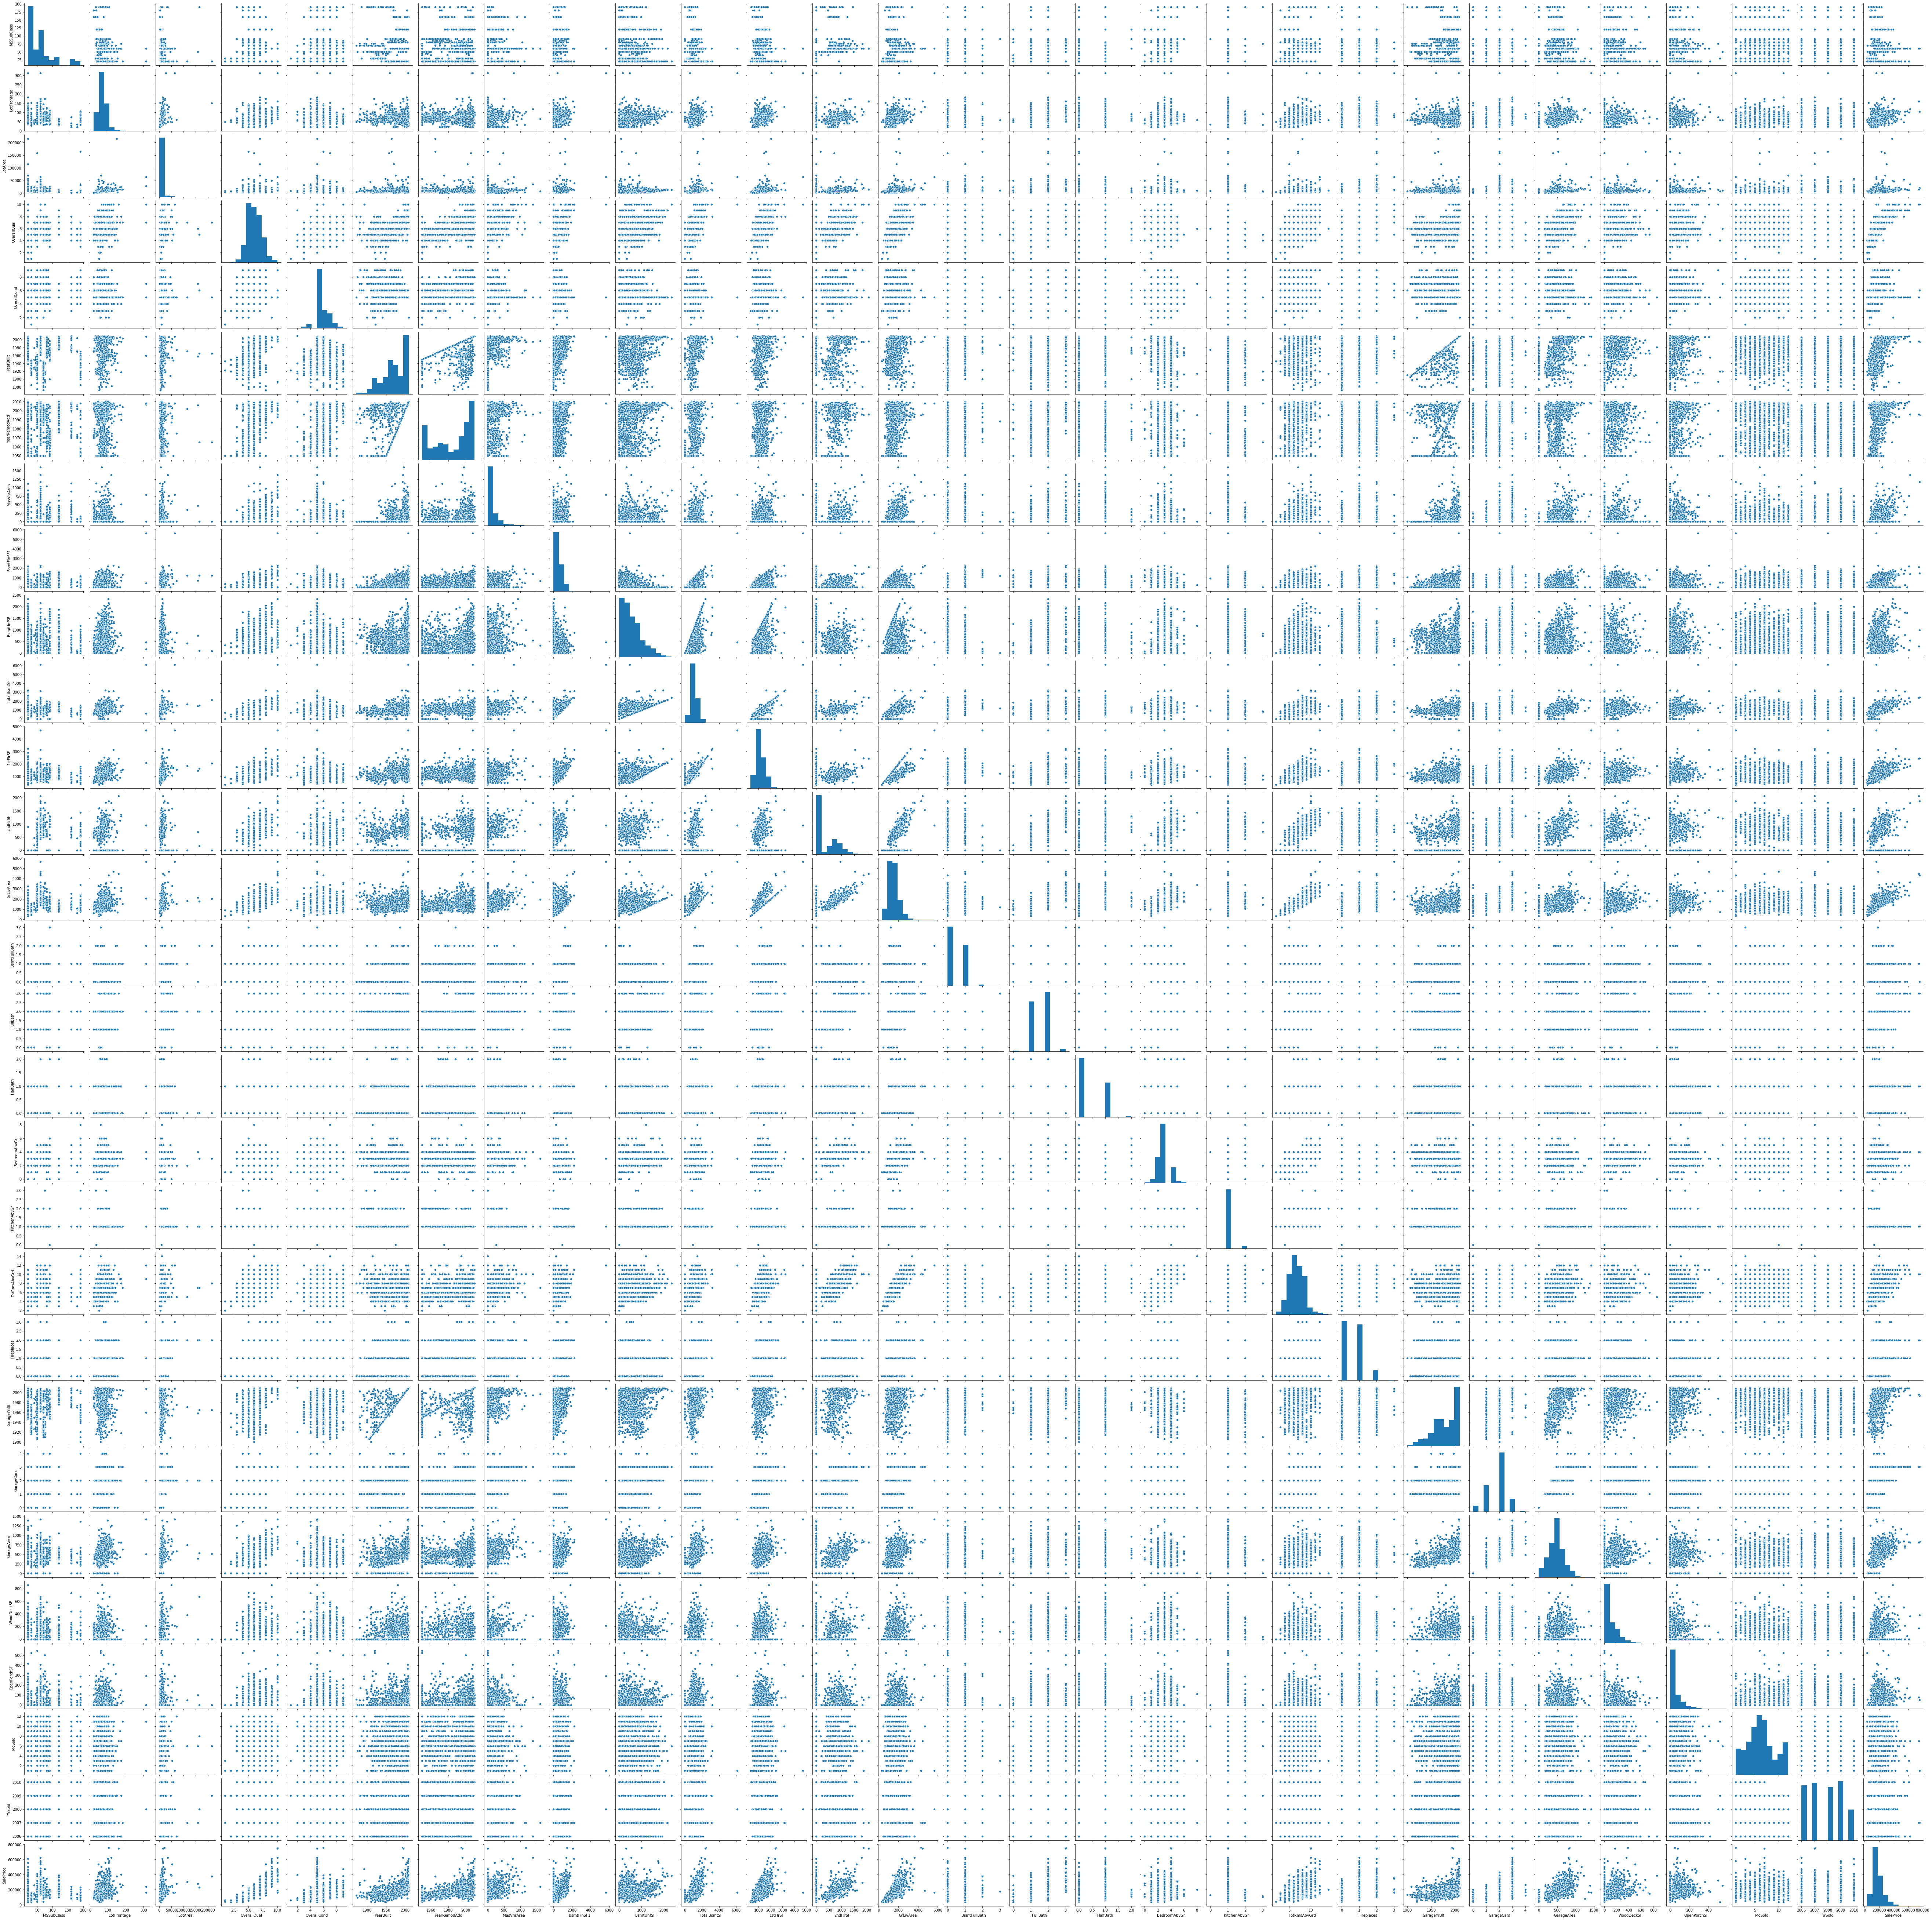

In [9]:
#plotting continuous variables to check their collinearity and distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
sns.pairplot(cont_house_df)
plt.show()

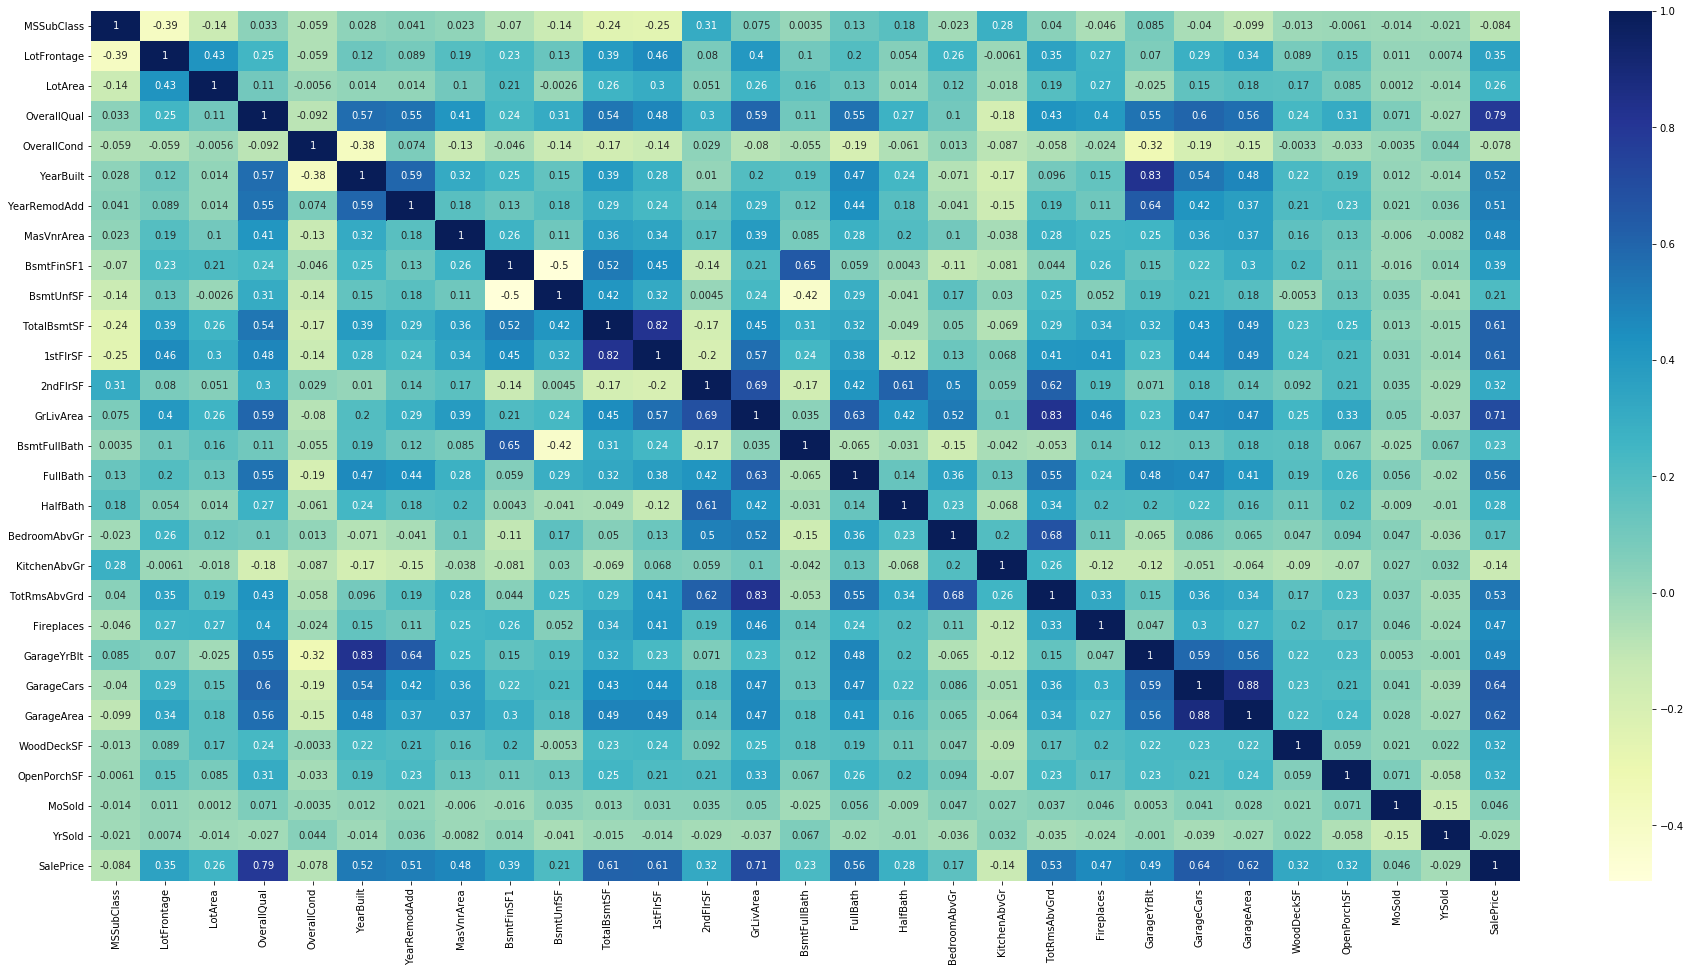

In [10]:
#checking collinearity betwwn features and with target variable
plt.figure(figsize=(32,16))

sns.heatmap(cont_house_df.corr(),cmap="YlGnBu",annot=True)
plt.show()

In [11]:
cont_house_df.isnull().sum()

MSSubClass        0
LotFrontage     259
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [12]:
#imputing missing values of continuous variables with the median values of that column
cont_house_df.loc[cont_house_df.GarageYrBlt.isna(),'GarageYrBlt']=cont_house_df.GarageYrBlt.median()
cont_house_df.loc[cont_house_df.LotFrontage.isna(),'LotFrontage']=cont_house_df.LotFrontage.median()
cont_house_df.loc[cont_house_df.MasVnrArea.isna(),'MasVnrArea']=cont_house_df.MasVnrArea.median()



In [13]:
cat_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

In [14]:
cat_house_df.isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [15]:
#dropping categorical columns having large no of null values
cat_house_df=cat_house_df.drop(columns=['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'])

In [16]:
cat_house_df.isna().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

In [17]:
# imputing categorical values as given in data description since these are not null values but have a proper meaning
cat_house_df.loc[cat_house_df.BsmtQual.isna(),'BsmtQual']='No Basement'
cat_house_df.loc[cat_house_df.BsmtCond.isna(),'BsmtCond']='No Basement'
cat_house_df.loc[cat_house_df.BsmtExposure.isna(),'BsmtExposure']='No Basement'
cat_house_df.loc[cat_house_df.BsmtFinType1.isna(),'BsmtFinType1']='No Basement'
cat_house_df.loc[cat_house_df.BsmtFinType2.isna(),'BsmtFinType2']='No Basement'
cat_house_df.loc[cat_house_df.GarageType.isna(),'GarageType']='No Garage'
cat_house_df.loc[cat_house_df.GarageFinish.isna(),'GarageFinish']='No Garage'
cat_house_df.loc[cat_house_df.GarageQual.isna(),'GarageQual']='No Garage'
cat_house_df.loc[cat_house_df.GarageCond.isna(),'GarageCond']='No Garage'

In [18]:
cat_house_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [19]:
cat_house_df.loc[cat_house_df.Electrical.isna(),'Electrical']='SBrkr'#imputing with modal value
cat_house_df.loc[cat_house_df.MasVnrType.isna(),'MasVnrType']='None'#imputing with none since this is not missing value


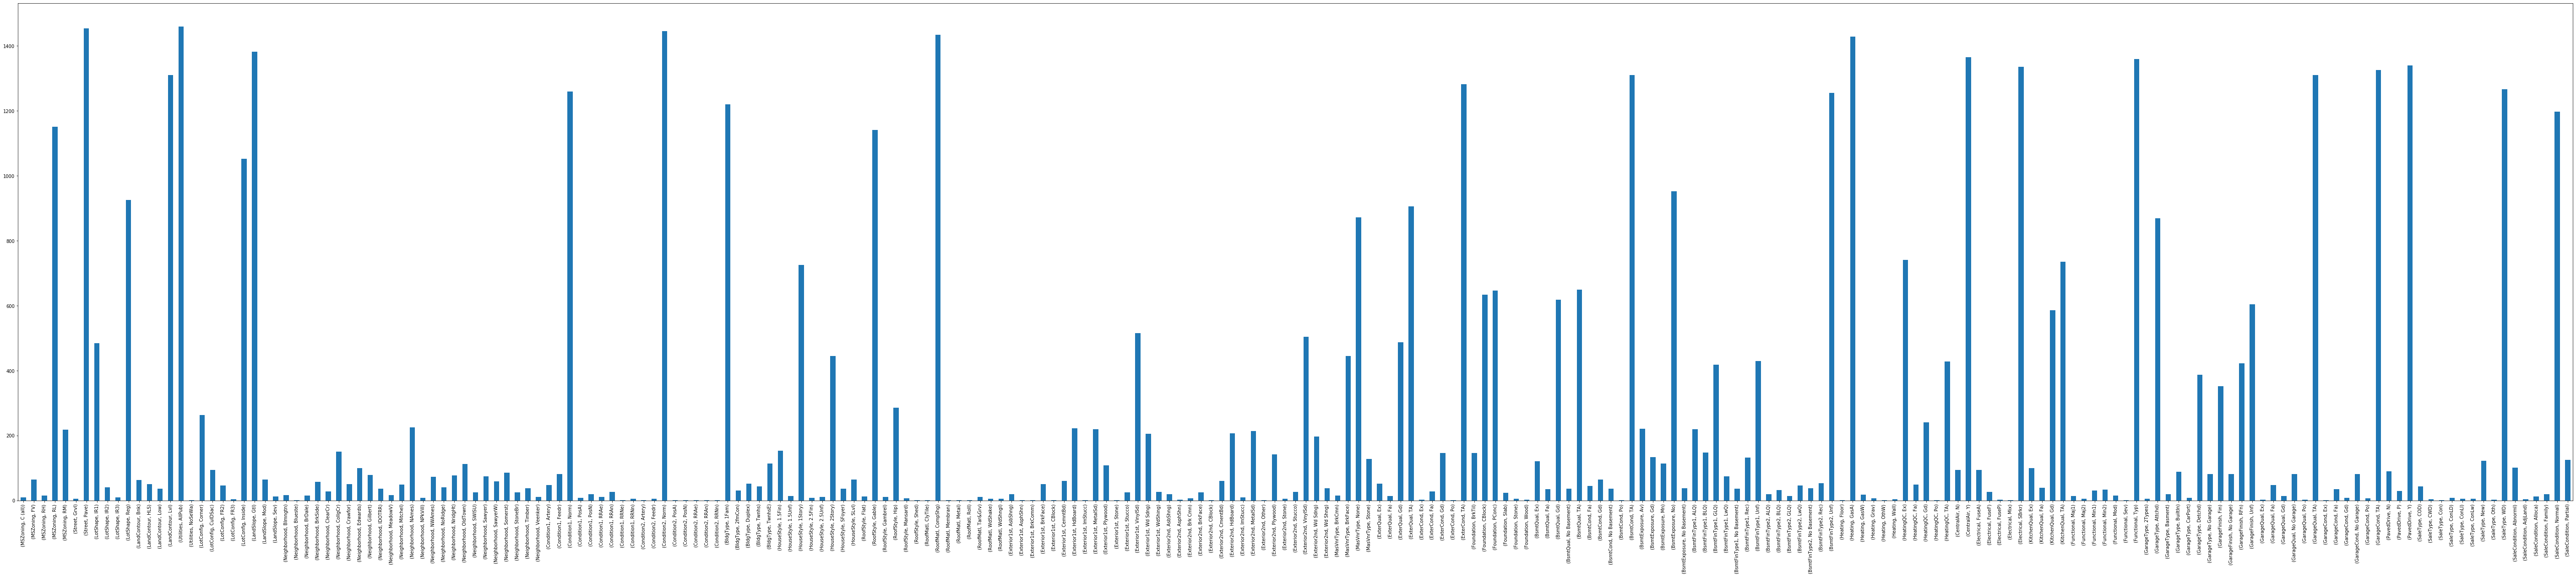

In [20]:
# checking skewness in the categorical columns
plt.figure(figsize=(100,20))
cat_house_df.apply(pd.value_counts).T.stack().plot(kind='bar')
plt.show()

In [21]:
#dropping skewed categorical columns
cat_house_df=cat_house_df.drop(columns=['Street','Utilities','LandSlope','Condition2','RoofMatl','BsmtFinType2','Heating','Electrical','CentralAir','Functional','GarageQual','GarageCond','SaleType','PavedDrive'])

In [22]:
#dropping skewed categorical columns
cat_house_df=cat_house_df.drop(columns=['LandContour','Condition1'])


In [23]:
#creating dummies of the categorical columns
house_dummies = pd.get_dummies(cat_house_df, drop_first=True)
house_dummies.head()
cat_house_df = cat_house_df.drop(list(cat_house_df.columns), axis=1)
cat_house_df = pd.concat([cat_house_df, house_dummies], axis=1)

In [30]:
# converting all categorical variables which were of type object into float
cat_house_df=cat_house_df.astype('float64')
cat_house_df.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0          0.0          0.0          1.0          0.0           0.0   
1          0.0          0.0          1.0          0.0           0.0   
2          0.0          0.0          1.0          0.0           0.0   
3          0.0          0.0          1.0          0.0           0.0   
4          0.0          0.0          1.0          0.0           0.0   

   LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0           0.0           1.0                0.0            0.0   
1           0.0           1.0                0.0            1.0   
2           0.0           0.0                0.0            0.0   
3           0.0           0.0                0.0            0.0   
4           0.0           0.0                0.0            1.0   

   LotConfig_FR3  ...  GarageType_Detchd  GarageType_No Garage  \
0            0.0  ...                0.0                   0.0   
1            0.0  ...                0.0                   0.0   
2            0.0  ...                0.0                   0.0   
3            0.0  ...                1.0                   0.0   
4            0.0  ...                0.0                   0.0   

   GarageFinish_No Garage  GarageFinish_RFn  GarageFinish_Unf  \
0                     0.0               1.0               0.0   
1                     0.0               1.0               0.0   
2                     0.0               1.0               0.0   
3                     0.0               0.0               1.0   
4                     0.0               1.0               0.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   1.0                    0.0  
2                   1.0                    0.0  
3                   0.0                    0.0  
4                   1.0                    0.0  

[5 rows x 134 columns]

In [31]:
#merging the categorical and continuous features after performing EDA into a new dataframe
house_new_df=pd.concat([cont_house_df,cat_house_df],axis=1)

In [32]:
print(len(cont_house_df))
print(len(cat_house_df))
print(len(house_df))

1460
1460
1460


In [33]:
house_new_df.isna().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 163, dtype: int64

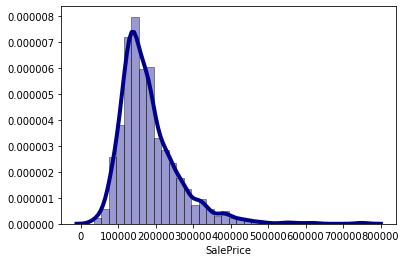

In [34]:
#plotting the target variable to check whether it is normally distributed or not
sns.distplot(house_new_df.SalePrice, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [35]:
#checking outliers if any in the target variable
house_new_df.SalePrice.describe(percentiles=[0.1,0.2,0.5,0.75,0.9,0.95,0.99])

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
10%      106475.000000
20%      124000.000000
50%      163000.000000
75%      214000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64

In [36]:
#treating the target variable to make it normally distributed
house_new_df.SalePrice=np.log(house_new_df.SalePrice)

In [37]:
#treating the columns whith years since years will not give result to the model,so calculating the age for each
house_new_df['AgeOfHouse']=2020-house_new_df.YearBuilt
house_new_df['AgeOfRemod']=2020-house_new_df.YearRemodAdd
house_new_df['AgeOfGarage']=2020-house_new_df.GarageYrBlt
house_new_df['AgeOfSoldYr']=2020-house_new_df.YrSold


In [38]:
#removing columns with years
house_new_df=house_new_df.drop(columns=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'])

In [39]:
house_new_df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageFinish_Unf  \
0         706        150          856       856  ...               0.0   
1         978        284         1262      1262  ...               0.0   
2         486        434          920       920  ...               0.0   
3         216        540          756       961  ...               1.0   
4         655        490         1145      1145  ...               0.0   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                    0.0                   0.0                   0.0   
1                    0.0                   0.0                   0.0   
2                    0.0                   0.0                   0.0   
3                    0.0                   0.0                   0.0   
4                    0.0                   0.0                   0.0   

   SaleCondition_Normal  SaleCondition_Partial  AgeOfHouse  AgeOfRemod  \
0                   1.0                    0.0          17          17   
1                   1.0                    0.0          44          44   
2                   1.0                    0.0          19          18   
3                   0.0                    0.0         105          50   
4                   1.0                    0.0          20          20   

   AgeOfGarage  AgeOfSoldYr  
0         17.0           12  
1         44.0           13  
2         19.0           12  
3         22.0           14  
4         20.0           12  

[5 rows x 163 columns]

#### Perform RFE to choose best 50 features on which model is to be made and regression to be done

In [40]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn
from sklearn.model_selection import train_test_split
#splitting into train and test data
df_train_rfe,df_test_rfe=train_test_split(house_new_df, train_size=0.7, test_size=0.3, random_state=100)

In [41]:
#perform scaling on the continuous features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cont_house_df.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [42]:
varlist=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'MoSold', 'SalePrice','AgeOfHouse','AgeOfRemod','AgeOfGarage','AgeOfSoldYr']


In [43]:
df_train_rfe[varlist]=scaler.fit_transform(df_train_rfe[varlist])

C:\Users\Prakhar\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Prakhar\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [44]:
df_train_rfe.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
210    -0.657071    -0.115302 -0.473765    -0.779861     0.383154   -0.558025   
318     0.035976     0.926898 -0.056845     0.649651    -0.533005    0.809137   
239    -0.195040    -0.794998 -0.169324    -0.065105    -1.449164   -0.558025   
986    -0.195040    -0.477806 -0.502297    -0.065105     2.215472   -0.558025   
1416    3.039179    -0.432493  0.082905    -1.494617     0.383154   -0.558025   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageFinish_Unf  \
210     0.043512  -0.374367    -0.430911 -0.765065  ...               0.0   
318     1.160345  -0.454644     0.621579  0.511914  ...               0.0   
239    -0.761296   0.171964    -0.712011 -0.930972  ...               1.0   
986    -0.963574  -0.175904    -1.256778 -0.420683  ...               1.0   
1416   -0.963574   0.475233    -0.620490  0.195183  ...               1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
210                     0.0                   0.0                   0.0   
318                     0.0                   0.0                   0.0   
239                     0.0                   0.0                   0.0   
986                     0.0                   0.0                   0.0   
1416                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  AgeOfHouse  AgeOfRemod  \
210                    1.0                    0.0    1.524903    1.694350   
318                    1.0                    0.0   -0.717033   -0.390956   
239                    1.0                    0.0    0.865510    1.694350   
986                    1.0                    0.0    2.019448   -0.875911   
1416                   1.0                    0.0    2.843689    1.694350   

      AgeOfGarage  AgeOfSoldYr  
210     -0.048537    -0.134653  
318     -0.591737    -0.881833  
239      1.246786    -1.629012  
986      1.205001     1.359706  
1416     0.327524    -1.629012  

[5 rows x 163 columns]

In [45]:
y_train_rfe=df_train_rfe.pop('SalePrice')
x_train_rfe=df_train_rfe

In [46]:
#perform RFE to get best fit with 50 features
from sklearn.feature_selection import RFE

lm = LinearRegression()
rfe1 = RFE(lm, 50)

# Fit with 50 features
rfe1.fit(x_train_rfe, y_train_rfe)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  


[False False False  True  True False False False False False False  True
 False False False False False False False  True False False False False
  True  True  True  True False  True False False  True False False  True
 False  True  True False  True  True False False  True False False False
 False  True  True False False False False  True  True False  True False
 False  True False False False False False False False False False False
 False False False False  True  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True False  True False False False  True False  True
  True  True  True False  True False False  True False False False False
 False False  True False  True False False  True False  True  True  True
  True False False  True False False False False False  True False  True
  True  True  True False False False]
[ 27  41  40 

In [47]:
list(zip(x_train_rfe.columns,rfe1.support_,rfe1.ranking_))

[('MSSubClass', False, 27),
 ('LotFrontage', False, 41),
 ('LotArea', False, 40),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 93),
 ('BsmtFinSF1', False, 75),
 ('BsmtUnfSF', False, 64),
 ('TotalBsmtSF', False, 111),
 ('1stFlrSF', False, 79),
 ('2ndFlrSF', False, 77),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 29),
 ('FullBath', False, 47),
 ('HalfBath', False, 50),
 ('BedroomAbvGr', False, 54),
 ('KitchenAbvGr', False, 49),
 ('TotRmsAbvGrd', False, 35),
 ('Fireplaces', False, 39),
 ('GarageCars', True, 1),
 ('GarageArea', False, 83),
 ('WoodDeckSF', False, 59),
 ('OpenPorchSF', False, 72),
 ('MoSold', False, 108),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 18),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 60),
 ('LotConfig_CulDSac', False, 86),
 ('LotConfig_FR2', True, 1),
 ('LotConfig_FR3', False, 43),
 ('LotConfig_Inside', False, 53),
 ('Neighborho

In [48]:
#after RFE, featues obtained
x_train_rfe.columns[rfe1.support_]

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_FR2', 'Neighborhood_Blueste', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'BldgType_Twnhs', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa',
       'ExterCond_Gd', 'ExterCond_TA', 'Foundation_Stone', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'BsmtCond_No Basement', 'BsmtExposure_Gd', 'BsmtFinType1_No Basement',
       'BsmtFinType1_Unf', 'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_CarPort',
       'SaleCondition_AdjLand', 'Sal

In [49]:
house_new_df

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0             60         65.0     8450            7            5       196.0   
1             20         80.0     9600            6            8         0.0   
2             60         68.0    11250            7            5       162.0   
3             70         60.0     9550            7            5         0.0   
4             60         84.0    14260            8            5       350.0   
...          ...          ...      ...          ...          ...         ...   
1455          60         62.0     7917            6            5         0.0   
1456          20         85.0    13175            6            6       119.0   
1457          70         66.0     9042            7            9         0.0   
1458          20         68.0     9717            5            6         0.0   
1459          20         75.0     9937            5            6         0.0   

      BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  GarageFinish_Unf  \
0            706        150          856       856  ...               0.0   
1            978        284         1262      1262  ...               0.0   
2            486        434          920       920  ...               0.0   
3            216        540          756       961  ...               1.0   
4            655        490         1145      1145  ...               0.0   
...          ...        ...          ...       ...  ...               ...   
1455           0        953          953       953  ...               0.0   
1456         790        589         1542      2073  ...               1.0   
1457         275        877         1152      1188  ...               0.0   
1458          49          0         1078      1078  ...               1.0   
1459         830        136         1256      1256  ...               0.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                       0.0                   0.0                   0.0   
1                       0.0                   0.0                   0.0   
2                       0.0                   0.0                   0.0   
3                       0.0                   0.0                   0.0   
4                       0.0                   0.0                   0.0   
...                     ...                   ...                   ...   
1455                    0.0                   0.0                   0.0   
1456                    0.0                   0.0                   0.0   
1457                    0.0                   0.0                   0.0   
1458                    0.0                   0.0                   0.0   
1459                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  AgeOfHouse  AgeOfRemod  \
0                      1.0                    0.0          17          17   
1                      1.0                    0.0          44          44   
2                      1.0                    0.0          19          18   
3                      0.0                    0.0         105          50   
4                      1.0                    0.0          20          20   
...                    ...                    ...         ...         ...   
1455                   1.0                    0.0          21          20   
1456                   1.0                    0.0          42          32   
1457                   1.0                    0.0          79          14   
1458                   1.0                    0.0          70          24   
1459                   1.0                    0.0          55          55   

      AgeOfGarage  AgeOfSoldYr  
0            17.0           12  
1            44.0           13  
2            19.0           12  
3            22.0           14  
4            20.0           12  
...           ...          ...  
1455         21.0           13  
1456         42.0           10

In [50]:
#splitting into train and test data to perform regression
df_train,df_test=train_test_split(house_new_df, train_size=0.8, test_size=0.2, random_state=100)

df_train[varlist]=scaler.fit_transform(df_train[varlist])
df_test[varlist]=scaler.transform(df_test[varlist])

C:\Users\Prakhar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Prakhar\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Prakhar\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [51]:
df_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'GarageFinish_Unf', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial',
       'AgeOfHouse', 'AgeOfRemod', 'AgeOfGarage', 'AgeOfSoldYr'],
      dtype='object', length=163)

In [52]:
#splitting train and test data into X_train,y_train,X_test,y_test
y_train=df_train.pop('SalePrice')
X_train=df_train
y_test=df_test.pop('SalePrice')
X_test=df_test

In [53]:
#using only the features obtained from RFE
X_train=X_train[x_train_rfe.columns[rfe1.support_]]
X_test=X_test[x_train_rfe.columns[rfe1.support_]]

In [54]:
#fitting 5 fold cross validation
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [55]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.049216      0.089462         0.001796        0.000745      0.0001   
1       0.003184      0.000404         0.001616        0.000508       0.001   
2       0.000000      0.000000         0.003125        0.006250        0.01   
3       0.006250      0.007654         0.000000        0.000000        0.05   
4       0.006247      0.007652         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.253066          -0.233381          -0.243576   
1   {'alpha': 0.001}          -0.253066          -0.233380          -0.243582   
2    {'alpha': 0.01}          -0.253073          -0.233373          -0.243642   
3    {'alpha': 0.05}          -0.253096          -0.233349          -0.243873   
4     {'alpha': 0.1}          -0.253115          -0.233327          -0.244106   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.245587  ...        -0.240875        0.008728               16   
1          -0.245571  ...        -0.240871        0.008730               15   
2          -0.245421  ...        -0.240835        0.008746               14   
3          -0.244822  ...        -0.240717        0.008774               13   
4          -0.244199  ...        -0.240589        0.008815               11   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.225131           -0.230352           -0.217277   
1           -0.225131           -0.230352           -0.217278   
2           -0.225131           -0.230346           -0.217286   
3           -0.225129           -0.230328           -0.217321   
4           -0.225129           -0.230324           -0.217404   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.221126           -0.233014         -0.225380         0.005776  
1           -0.221129           -0.233014         -0.225381         0.005775  
2           -0.221163           -0.233015         -0.225388         0.005767  
3           -0.221301           -0.233020         -0.225420         0.005736  
4           -0.221445           -0.233028         -0.225466         0.005693  

[5 rows x 21 columns]

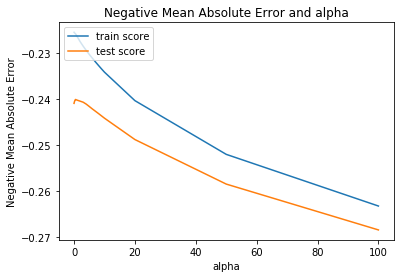

In [56]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [57]:
#creating ridge regression with alpha=10
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.22422134,  0.13719749,  0.34262929,  0.1312538 ,  0.14631991,
        0.11839913,  0.23404037, -0.01092197, -0.10489185, -0.05653189,
       -0.03212493,  0.1146962 ,  0.22046552,  0.31787724, -0.14351748,
       -0.1353229 ,  0.19297553,  0.28496323,  0.16513695,  0.19215793,
        0.08721169, -0.27391498, -0.08500767,  0.21694177, -0.01888486,
        0.08497519,  0.00478126, -0.10680684, -0.01667793,  0.01960225,
        0.02790531, -0.15669397, -0.11492657, -0.17793781, -0.15619818,
       -0.17793781,  0.23490626, -0.17793781, -0.14764412, -0.04928335,
       -0.19860076, -0.1184915 , -0.18105379,  0.1157277 , -0.09693247,
        0.05915186,  0.0072517 ,  0.13558826,  0.21834583, -0.19387113])

In [58]:
#calculating adjusted r2-square and mean squared error both both train and test set
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
pred_train_rr= ridge.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

0.34416322713706965
0.8815516730865978
0.3449563398747563
0.8919868452254056


In [59]:
#creating ridge regression with alpha=5

alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

#calculating adjusted r2-square and mean squared error both both train and test set
pred_train_rr= ridge.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

0.3398927160729638
0.8844729415605436
0.34516780588259927
0.8918543756398302


In [60]:
#creating ridge regression with alpha=1
#calculating adjusted r2-square and mean squared error both both train and test set

alpha = 1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

pred_train_rr= ridge.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

0.3346006117800682
0.8880424305964041
0.3463619751453903
0.891104783256567


In [61]:
#creating ridge regression with alpha=3
#calculating adjusted r2-square and mean squared error both both train and test set

alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

pred_train_rr= ridge.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 0.19765832  0.13605706  0.34388756  0.12530333  0.30636803  0.31652563
  0.39907478  0.16824982 -0.16383497 -0.07832133 -0.07164026  0.13384445
  0.27867735  0.38023744 -0.15568481 -0.2198744   0.26109916  0.33497776
  0.215229    0.28070572  0.13263882 -0.32658798 -0.18748119  0.25749026
 -0.04559283  0.12290796  0.05296887 -0.1884321  -0.09235348 -0.0582778
  0.0815316  -0.24827914 -0.15764068 -0.21460881 -0.21757311 -0.21460881
  0.24480705 -0.21460881 -0.14726124 -0.13792326 -0.2739277  -0.15985956
 -0.22719299  0.11468032 -0.14393654  0.15424246  0.0340759   0.15828483
  0.24109742 -0.19560935]
0.33768501007364954
0.8859688339715592
0.34545073154455297
0.8916770143001159


In [62]:
#creating ridge regression with alpha=10
#calculating adjusted r2-square and mean squared error both both train and test set

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

pred_train_rr= ridge.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

0.34416322713706965
0.8815516730865978
0.3449563398747563
0.8919868452254056


In [63]:
#creating ridge regression with alpha=12
#calculating adjusted r2-square and mean squared error both both train and test set

alpha = 12
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

pred_train_rr= ridge.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

0.3456251490430691
0.8805432563489562
0.34503153791034763
0.8919397478891438


### From the above observations, alpha=10 for Ridge regression

In [64]:
#creating cross validation for Lasso Regression with 5 folds
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


lasso = Lasso()

# cross validation
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [65]:
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1.mean_train_score

0    -0.225701
1    -0.230649
2    -0.271339
3    -0.311707
4    -0.337317
5    -0.381791
6    -0.448771
7    -0.520449
8    -0.589882
9    -0.649268
10   -0.711364
11   -0.776354
12   -0.782533
13   -0.782533
14   -0.782533
15   -0.782533
16   -0.782533
17   -0.782533
18   -0.782533
19   -0.782533
20   -0.782533
21   -0.782533
22   -0.782533
23   -0.782533
24   -0.782533
25   -0.782533
Name: mean_train_score, dtype: float64

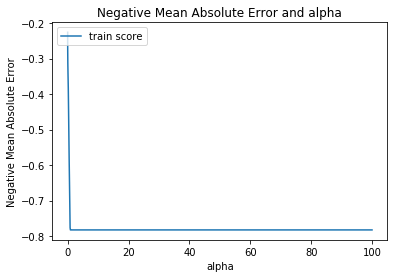

In [66]:
# plotting mean test and train scoes with alpha 
cv_results1['param_alpha'] = cv_results1['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results1['param_alpha'], cv_results1['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [67]:
#creating lasso regression with alpha=0
alpha =0

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso.coef_

C:\Users\Prakhar\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\Prakhar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Prakhar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.71131357019459, tolerance: 0.11679999999999996
  positive)


array([ 0.16944131,  0.12746186,  0.34255001,  0.12541488,  0.89093017,
        0.93414686,  0.94177395,  0.72384048, -0.21526934, -0.1021065 ,
       -0.1825821 ,  0.13801045,  0.30912419,  0.41569232, -0.17683107,
       -0.31289669,  0.31225238,  0.36221433,  0.21494559,  0.34664124,
        0.17772225, -0.34933629, -0.46918694,  0.27786853, -0.18647958,
        0.14605639,  0.078534  , -0.7883367 , -0.67639327, -0.64864579,
        0.19439788, -0.35103884, -0.19652119, -0.6414544 , -0.27540927,
       -0.1245034 ,  0.24804236,  0.0233426 , -0.14787413, -0.57173938,
       -0.31831806, -0.19756739, -0.26860406,  0.11615803, -0.14492971,
        0.33069864,  0.03700902,  0.15764013,  0.2389506 , -0.19023523])

In [68]:
#calculating adjusted r2-square and mean squared error both both train and test set

pred_train_rr= lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

0.3328769198736672
0.8891929562154202
0.3526690840264763
0.887102800716556


In [69]:
#creating lasso regression with alpha=0.001
#calculating adjusted r2-square and mean squared error both both train and test set
alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

print(lasso.coef_)
pred_train_rr= lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 0.17504555  0.1293274   0.34249797  0.12529198  0.81967616  0.85614659
  0.87449747  0.65363285 -0.2012191  -0.09411534 -0.11909349  0.13540544
  0.30589818  0.4107544  -0.17105556 -0.29248042  0.3041006   0.35940006
  0.21318407  0.33759368  0.1651119  -0.34921868 -0.41428828  0.27515556
 -0.07431136  0.13690036  0.06831498 -0.58449115 -0.47790151 -0.44922712
  0.14714359 -0.33197173 -0.18768491 -0.59978094 -0.26205338 -0.1203315
  0.24762785 -0.00219687 -0.14614241 -0.45072149 -0.308845   -0.18855407
 -0.25967318  0.11555844 -0.13514904  0.28087959  0.02823763  0.15499183
  0.23614249 -0.19074781]
0.33311242998342844
0.8890361089905354
0.3490195568603137
0.8894273001005124


In [70]:
#creating lasso regression with alpha=0.001
#calculating adjusted r2-square and mean squared error both both train and test set
alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

print(lasso.coef_)
pred_train_rr= lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 0.21222842  0.13788809  0.34295736  0.1261445   0.17403203  0.15951514
  0.26466463  0.02382202 -0.08174455 -0.03097425 -0.          0.11877693
  0.27049239  0.37747535 -0.14122573 -0.1396529   0.23792682  0.33667081
  0.19963875  0.26109396  0.05416862 -0.33289793 -0.          0.25105741
 -0.          0.07470594  0.         -0.08281527 -0.          0.02623383
  0.         -0.17420276 -0.11433937 -0.48845158 -0.15768184 -0.07336593
  0.24398117 -0.00213361 -0.14311364 -0.         -0.24195357 -0.12622367
 -0.19358473  0.11300977 -0.05675251  0.          0.          0.14523662
  0.22841407 -0.19853341]
0.3423599739609143
0.882789648229482
0.34651861029538794
0.8910062696977336


In [71]:
#creating lasso regression with alpha=0.01
#calculating adjusted r2-square and mean squared error both both train and test set
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

print(lasso.coef_)
pred_train_rr= lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 3.28567676e-01  1.30444295e-01  3.38625569e-01  1.55252185e-01
  0.00000000e+00  0.00000000e+00  1.18144926e-01 -9.87203690e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.40991323e-02 -3.22870684e-02 -0.00000000e+00
  0.00000000e+00  8.52720804e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.53269097e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -3.79027776e-02 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -9.58173367e-03 -0.00000000e+00 -1.17728305e-16
  1.64667388e-01 -1.07720086e-03 -1.15519125e-01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -5.36154761e-02  1.12310292e-01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  3.96376582e-02 -2.01631401e-01]
0.3921727805289074
0.8462005102122254
0.3642290944284231
0.8795802679120613


### From the above observations, alpha=0.01 for Lasso regression

In [72]:
X_train.columns

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_FR2', 'Neighborhood_Blueste', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'BldgType_Twnhs', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa',
       'ExterCond_Gd', 'ExterCond_TA', 'Foundation_Stone', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'BsmtCond_No Basement', 'BsmtExposure_Gd', 'BsmtFinType1_No Basement',
       'BsmtFinType1_Unf', 'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_CarPort',
       'SaleCondition_AdjLand', 'Sal

In [73]:
#taking features with coefficients >0 to obtain best features
X_train_1=X_train[['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars','MSZoning_RL', 'MSZoning_RM','Neighborhood_Crawfor', 'Neighborhood_Edwards','Neighborhood_NridgHt','BldgType_Twnhs','ExterQual_TA','BsmtQual_No Basement','BsmtCond_No Basement', 'BsmtExposure_Gd', 'BsmtFinType1_No Basement',
       'BsmtFinType1_Unf','KitchenQual_TA', 'GarageType_Attchd','SaleCondition_Partial', 'AgeOfHouse']]
X_test_1=X_test[['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars','MSZoning_RL', 'MSZoning_RM','Neighborhood_Crawfor', 'Neighborhood_Edwards','Neighborhood_NridgHt','BldgType_Twnhs','ExterQual_TA','BsmtQual_No Basement','BsmtCond_No Basement', 'BsmtExposure_Gd', 'BsmtFinType1_No Basement',
       'BsmtFinType1_Unf','KitchenQual_TA', 'GarageType_Attchd','SaleCondition_Partial', 'AgeOfHouse']]

In [74]:
#creating lasso regression with alpha=0.01 with 20 features
#calculating adjusted r2-square and mean squared error both both train and test set
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_1, y_train) 

print(lasso.coef_)
pred_train_rr= lasso.predict(X_train_1)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test_1)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 3.28570412e-01  1.30443646e-01  3.38625664e-01  1.55252232e-01
  1.18159210e-01 -9.87076049e-02  8.40982556e-02 -3.22885221e-02
  8.52695574e-02 -1.53256673e-02 -3.78997901e-02 -9.97677834e-03
 -2.35456611e-16  1.64665336e-01 -6.81121187e-04 -1.15519421e-01
 -5.36146612e-02  1.12306907e-01  3.96370987e-02 -2.01631742e-01]
0.39217302612625765
0.8462003175789736
0.3642284610510873
0.8795806867202453


In [75]:
X_train_1.columns

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NridgHt', 'BldgType_Twnhs', 'ExterQual_TA',
       'BsmtQual_No Basement', 'BsmtCond_No Basement', 'BsmtExposure_Gd',
       'BsmtFinType1_No Basement', 'BsmtFinType1_Unf', 'KitchenQual_TA',
       'GarageType_Attchd', 'SaleCondition_Partial', 'AgeOfHouse'],
      dtype='object')

In [76]:
#dropping the least important columns with very low coefficients

X_train_1=X_train_1.drop(columns=['BsmtQual_No Basement', 'BsmtCond_No Basement','BsmtFinType1_No Basement'])
X_test_1=X_test_1.drop(columns=['BsmtQual_No Basement', 'BsmtCond_No Basement','BsmtFinType1_No Basement'])

In [77]:
#creating lasso regression with alpha=0.01 for 17 variables
#calculating adjusted r2-square and mean squared error both both train and test set
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_1, y_train) 

print(lasso.coef_)
pred_train_rr= lasso.predict(X_train_1)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test_1)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 0.32907818  0.13058194  0.33846759  0.15512869  0.11811008 -0.09871157
  0.08426387 -0.03283981  0.08506126 -0.01500708 -0.037876    0.16489311
 -0.1150954  -0.05355083  0.11254309  0.03961492 -0.20159702]
0.39243779377047155
0.8459925780205648
0.36442783251859
0.8794488203310264


In [78]:
X_train_1.columns

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_NridgHt', 'BldgType_Twnhs', 'ExterQual_TA',
       'BsmtExposure_Gd', 'BsmtFinType1_Unf', 'KitchenQual_TA',
       'GarageType_Attchd', 'SaleCondition_Partial', 'AgeOfHouse'],
      dtype='object')

In [79]:
#dropping the least important columns with very low coefficients
X_train_1=X_train_1.drop(columns=['Neighborhood_Edwards','BldgType_Twnhs'])
X_test_1=X_test_1.drop(columns=['Neighborhood_Edwards','BldgType_Twnhs'])

In [80]:
#creating lasso regression with alpha=0.01 for 15 variables
#calculating adjusted r2-square and mean squared error both both train and test set
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_1, y_train) 

print(lasso.coef_)
pred_train_rr= lasso.predict(X_train_1)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test_1)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 0.3301881   0.13122873  0.33805547  0.15703874  0.11644705 -0.09809815
  0.08751958  0.08380873 -0.03755655  0.16389665 -0.11431459 -0.05331991
  0.1160404   0.03921876 -0.20123648]
0.39365982554620016
0.8450319417509352
0.36476864629281763
0.879223235397646


In [81]:
X_train_1.columns

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt',
       'ExterQual_TA', 'BsmtExposure_Gd', 'BsmtFinType1_Unf', 'KitchenQual_TA',
       'GarageType_Attchd', 'SaleCondition_Partial', 'AgeOfHouse'],
      dtype='object')

In [82]:
#dropping the least important columns with least coefficients
X_train_1=X_train_1.drop(columns=['ExterQual_TA','SaleCondition_Partial'])
X_test_1=X_test_1.drop(columns=['ExterQual_TA','SaleCondition_Partial'])

In [83]:
#creating lasso regression with alpha=0.01 for 13 variables
#calculating adjusted r2-square and mean squared error both both train and test set
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_1, y_train) 

print(lasso.coef_)
pred_train_rr= lasso.predict(X_train_1)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test_1)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 0.33502656  0.13006299  0.33903092  0.15814082  0.10729854 -0.10469683
  0.08810263  0.09581276  0.16201307 -0.1097321  -0.06876675  0.11692079
 -0.20770507]
0.39507631486330363
0.8439147054340317
0.3658777517359747
0.8784876578360549


In [84]:
X_train_1.columns

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt',
       'BsmtExposure_Gd', 'BsmtFinType1_Unf', 'KitchenQual_TA',
       'GarageType_Attchd', 'AgeOfHouse'],
      dtype='object')

In [85]:
#dropping the least important columns with very low coefficients

X_train_1=X_train_1.drop(columns=['KitchenQual_TA'])
X_test_1=X_test_1.drop(columns=['KitchenQual_TA'])

In [86]:
#creating lasso regression with alpha=0.01 for 12 variables
#calculating adjusted r2-square and mean squared error both both train and test set
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_1, y_train) 

print(lasso.coef_)
pred_train_rr= lasso.predict(X_train_1)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test_1)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 0.34638345  0.13357977  0.34172318  0.15944947  0.09662045 -0.11541347
  0.09204869  0.10250997  0.1604978  -0.10813438  0.11528137 -0.21697412]
0.3969128219329018
0.8424602117852605
0.3669591932081727
0.87776827716539


In [87]:
X_train_1.columns

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_Crawfor', 'Neighborhood_NridgHt',
       'BsmtExposure_Gd', 'BsmtFinType1_Unf', 'GarageType_Attchd',
       'AgeOfHouse'],
      dtype='object')

In [88]:
#dropping the least important column with least coefficients

X_train_1=X_train_1.drop(columns=['Neighborhood_Crawfor'])
X_test_1=X_test_1.drop(columns=['Neighborhood_Crawfor'])

In [89]:
#creating lasso regression with alpha=0.01 for 11 variables
#calculating adjusted r2-square and mean squared error both both train and test set
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_1, y_train) 

print(lasso.coef_)
pred_train_rr= lasso.predict(X_train_1)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test_1)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 0.34961235  0.13446362  0.34245183  0.15977564  0.09793873 -0.12126705
  0.09931811  0.15958954 -0.10937281  0.11403731 -0.21143146]
0.39948584227850514
0.8404110618190332
0.3682656706090878
0.8768963695398524


In [90]:
X_train_1.columns

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars', 'MSZoning_RL',
       'MSZoning_RM', 'Neighborhood_NridgHt', 'BsmtExposure_Gd',
       'BsmtFinType1_Unf', 'GarageType_Attchd', 'AgeOfHouse'],
      dtype='object')

In [91]:
#dropping the least important column with least coefficients
X_train_1=X_train_1.drop(columns=['MSZoning_RL'])
X_test_1=X_test_1.drop(columns=['MSZoning_RL'])

In [92]:
#creating lasso regression with alpha=0.01 for 10 variables
#calculating adjusted r2-square and mean squared error both both train and test set
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_1, y_train) 

print(lasso.coef_)
pred_train_rr= lasso.predict(X_train_1)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test_1)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 0.34580856  0.13644353  0.3439308   0.16082736 -0.21226561  0.1122569
  0.16601357 -0.11103743  0.12236979 -0.20867012]
0.3995851369375779
0.840331718338577
0.371121319379329
0.8749797982260249


### The top 10 significant variables in predicting the price of the house in order of significance are:

1. OverallQual
2. GrLivArea
3. MSZoning_RM
4. AgeOfHouse
5. BsmtExposure_Gd
6. GarageCars
7. OverallCond
8. GarageType_Attchd
9. Neighborhood_NridgHt
10. BsmtFinType1_Unf

In [94]:
#For problem statement 2, to check Lasso regression fit after we double the value of alpha
alpha =0.02

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

print(lasso.coef_)
pred_train_rr= lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 0.35623635  0.11501979  0.33431448  0.15965362  0.          0.
  0.13026286 -0.02161327 -0.         -0.         -0.          0.
  0.          0.         -0.         -0.          0.          0.
  0.          0.          0.         -0.         -0.          0.
 -0.          0.         -0.         -0.         -0.          0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.05005762 -0.         -0.08804447 -0.         -0.          0.
 -0.03184209  0.0889335  -0.         -0.         -0.          0.
  0.         -0.21379328]
0.40987706286404646
0.8320007933379424
0.3773092650690282
0.8707759559980912


In [95]:
X_train.columns

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_FR2', 'Neighborhood_Blueste', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'BldgType_Twnhs', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa',
       'ExterCond_Gd', 'ExterCond_TA', 'Foundation_Stone', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'BsmtCond_No Basement', 'BsmtExposure_Gd', 'BsmtFinType1_No Basement',
       'BsmtFinType1_Unf', 'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_CarPort',
       'SaleCondition_AdjLand', 'Sal

In [103]:
#For problem statement 2, to check Ridge regression fit after we double the value of alpha

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

pred_train_rr= ridge.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= ridge.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 0.24380824  0.1364725   0.34019972  0.13749014  0.09727262  0.0577141
  0.18367117 -0.06833955 -0.06889341 -0.04200354 -0.01953979  0.09300405
  0.17083467  0.25875219 -0.13194405 -0.08931691  0.14125804  0.23815461
  0.12501706  0.13101094  0.06049077 -0.22123194 -0.05103395  0.17713579
 -0.0106315   0.06030744 -0.02755064 -0.08120069 -0.00193861  0.03452873
  0.01096572 -0.1039673  -0.08612972 -0.14924399 -0.11655055 -0.14924399
  0.22009694 -0.14924399 -0.14579956 -0.02575931 -0.14385621 -0.08873838
 -0.14884198  0.1168878  -0.0651721   0.02628295 -0.00839815  0.11151433
  0.19012179 -0.19022332]
0.3506588338186086
0.8770383822649734
0.345896815393837
0.8913970766489008


In [97]:
#For problem statement 2,question 3, after removing top 5 features, which will be the next 5 features
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

print(lasso.coef_)
pred_train_rr= lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 3.28567676e-01  1.30444295e-01  3.38625569e-01  1.55252185e-01
  0.00000000e+00  0.00000000e+00  1.18144926e-01 -9.87203690e-02
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.40991323e-02 -3.22870684e-02 -0.00000000e+00
  0.00000000e+00  8.52720804e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.53269097e-02 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -3.79027776e-02 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -9.58173367e-03 -0.00000000e+00 -1.17728305e-16
  1.64667388e-01 -1.07720086e-03 -1.15519125e-01 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -5.36154761e-02  1.12310292e-01
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  3.96376582e-02 -2.01631401e-01]
0.3921727805289074
0.8462005102122254
0.3642290944284231
0.8795802679120613


In [98]:
X_train.columns

Index(['OverallQual', 'OverallCond', 'GrLivArea', 'GarageCars', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3',
       'LotConfig_FR2', 'Neighborhood_Blueste', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_MeadowV', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'BldgType_Twnhs', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa',
       'ExterCond_Gd', 'ExterCond_TA', 'Foundation_Stone', 'BsmtQual_Fa',
       'BsmtQual_Gd', 'BsmtQual_No Basement', 'BsmtQual_TA',
       'BsmtCond_No Basement', 'BsmtExposure_Gd', 'BsmtFinType1_No Basement',
       'BsmtFinType1_Unf', 'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'GarageType_Attchd', 'GarageType_CarPort',
       'SaleCondition_AdjLand', 'Sal

In [99]:
X_train_2=X_train[X_train.columns]
X_test_2=X_test[X_test.columns]

In [100]:
#removing top 5 features
X_train_2=X_train_2.drop(columns=['OverallCond','GarageCars','MSZoning_RL','GarageType_Attchd','BsmtFinType1_Unf'])
X_test_2=X_test_2.drop(columns=['OverallCond','GarageCars','MSZoning_RL','GarageType_Attchd','BsmtFinType1_Unf'])

In [101]:
#to check the coefficients after lasso regression by dropping top 5 features
alpha =0.01

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_2, y_train) 

print(lasso.coef_)
pred_train_rr= lasso.predict(X_train_2)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))
pred_test_rr= lasso.predict(X_test_2)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr)))
print(r2_score(y_test, pred_test_rr))

[ 0.39054421  0.35110198 -0.         -0.         -0.24833025 -0.
 -0.         -0.          0.          0.          0.1252792  -0.15060005
 -0.          0.          0.10776561  0.          0.          0.
 -0.14436894 -0.          0.         -0.          0.         -0.
 -0.          0.00295012 -0.          0.         -0.         -0.
 -0.00213415 -0.         -0.          0.22675476 -0.00129758 -0.
 -0.00783212  0.         -0.09609643 -0.         -0.         -0.
  0.04489034  0.03140621 -0.22034984]
0.4343092057386545
0.811375513810659
0.42729601591326066
0.8342681128788266


In [104]:
X_train_2.columns

Index(['OverallQual', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM',
       'LotShape_IR3', 'LotConfig_FR2', 'Neighborhood_Blueste',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'BldgType_Twnhs', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'ExterQual_Gd',
       'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA',
       'Foundation_Stone', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_No Basement', 'BsmtQual_TA', 'BsmtCond_No Basement',
       'BsmtExposure_Gd', 'BsmtFinType1_No Basement', 'HeatingQC_Po',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'GarageType_CarPort', 'SaleCondition_AdjLand', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'AgeOfHouse'],
 